In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

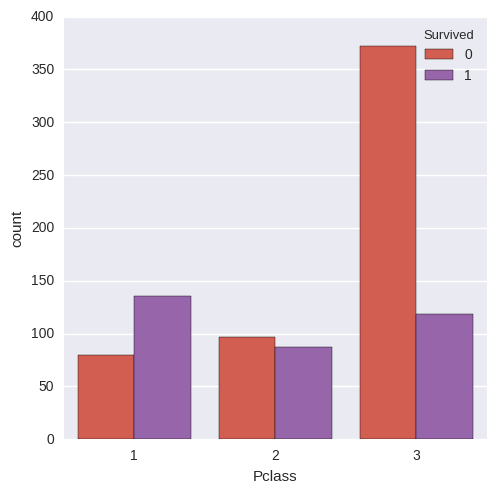

In [4]:
plt.figure(figsize=(12, 12))
plt.subplot(2,2,1)
flatui = ["#e74c3c", "#9b59b6", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.countplot(x='Pclass', hue = 'Survived', data=data, palette=flatui)

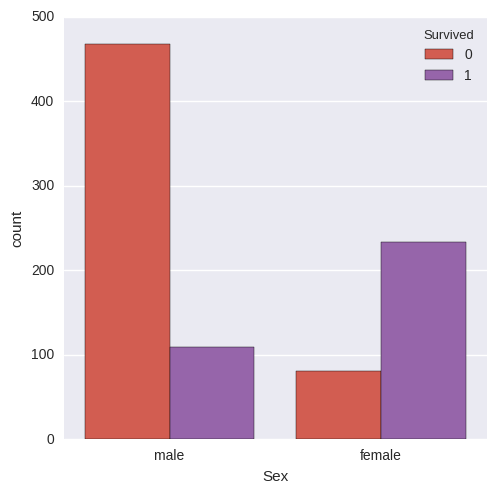

In [5]:
plt.figure(figsize=(12, 12))
plt.subplot(2,2,1)
flatui = ["#e74c3c", "#9b59b6", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.countplot(x='Sex', hue = 'Survived', data=data, palette=flatui)

In [6]:
data['Title'] = data['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
data["Age"] = data.groupby(['Sex','Pclass','Title'])['Age'].transform(lambda x: x.fillna(x.median()))
data["Fare"] = data.groupby(['Sex','Pclass','Title'])['Fare'].transform(lambda x: x.fillna(x.median()))

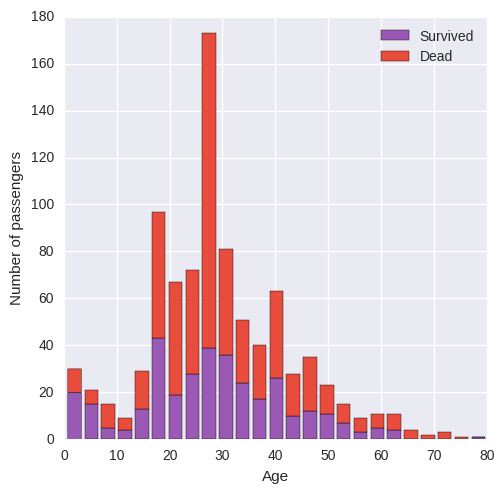

In [27]:
plt.figure(figsize=(12, 12))
plt.subplot(2,2,1)
plt.hist([data[data['Survived']==1]['Age'],data[data['Survived']==0]['Age']], stacked=True, color = ['#9b59b6','#e74c3c'],
         bins=25,label = ['Survived','Dead'])
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend()

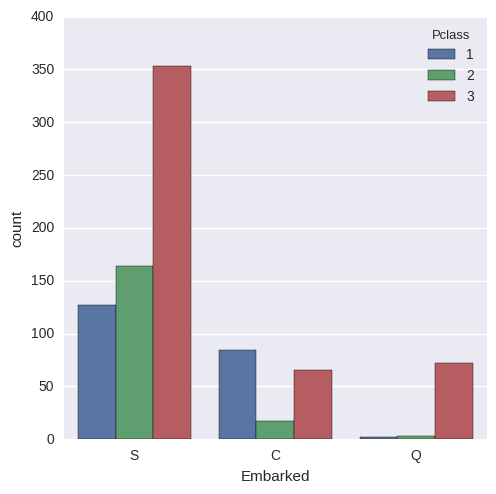

In [28]:
plt.figure(figsize=(12, 12))
plt.subplot(2,2,1)
sns.countplot(hue='Pclass', x='Embarked', data=data)

In [22]:
for df in [data]:
    df['FamilySize'] = df['Parch'] + df['SibSp'] + 1

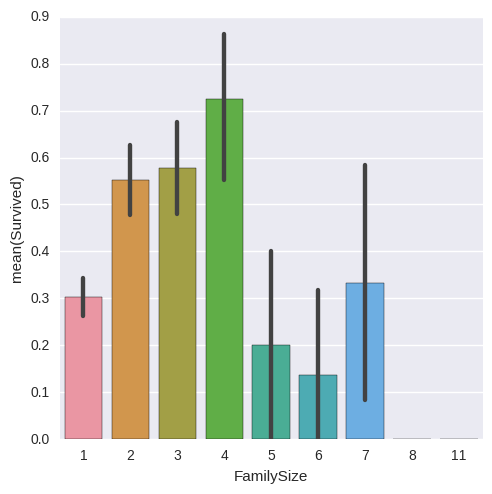

In [29]:
plt.figure(figsize=(12, 12))
plt.subplot(2,2,1)
sns.barplot(x='FamilySize', y='Survived' , data=data)

In [24]:
for df in [train_data, test_data]:
    df['FamilySize'] = df['Parch'] + df['SibSp'] + 1

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Jonkheer          1
Don               1
the Countess      1
Lady              1
Sir               1
Mme               1
Ms                1
Capt              1
Name: PassengerId, dtype: int64

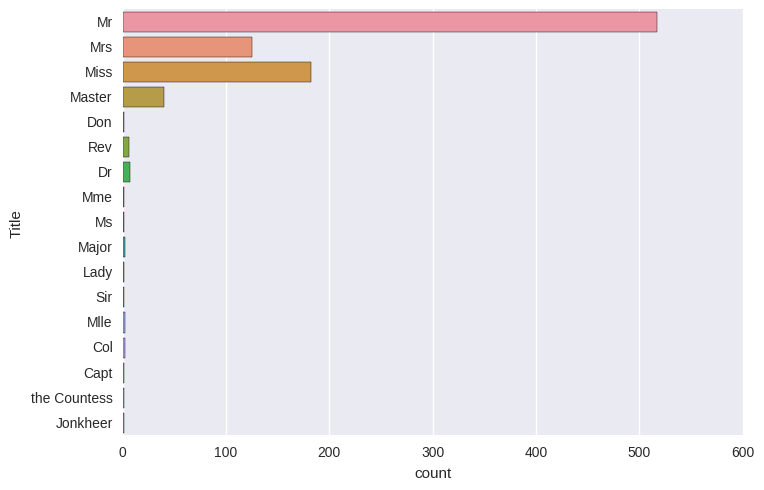

In [30]:
sns.countplot(y=df['Title'])
data.groupby('Title')['PassengerId'].count().sort_values(ascending=False)

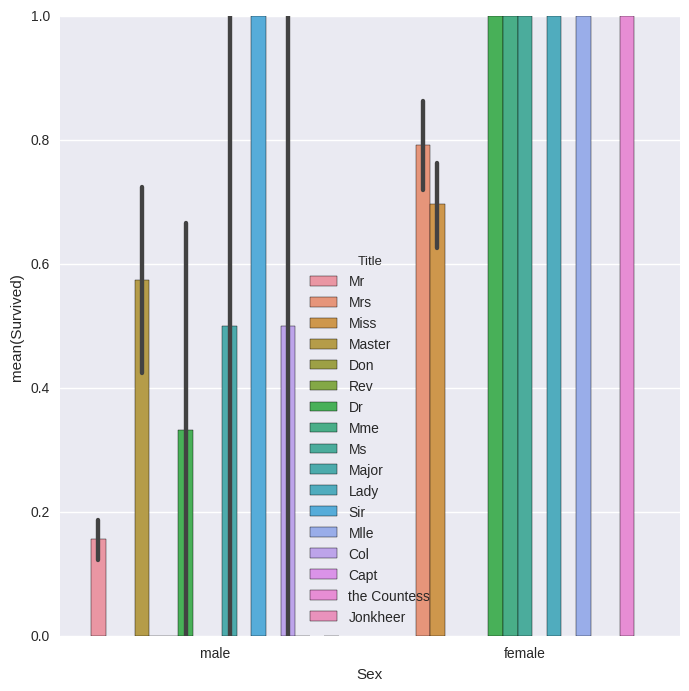

In [34]:
plt.figure(figsize=(8, 8))
sns.barplot(x='Sex', y='Survived', hue='Title', data=data)

Title
Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Ms                2
Mlle              2
Major             2
Don               1
Dona              1
the Countess      1
Jonkheer          1
Lady              1
Sir               1
Mme               1
Capt              1
Name: PassengerId, dtype: int64

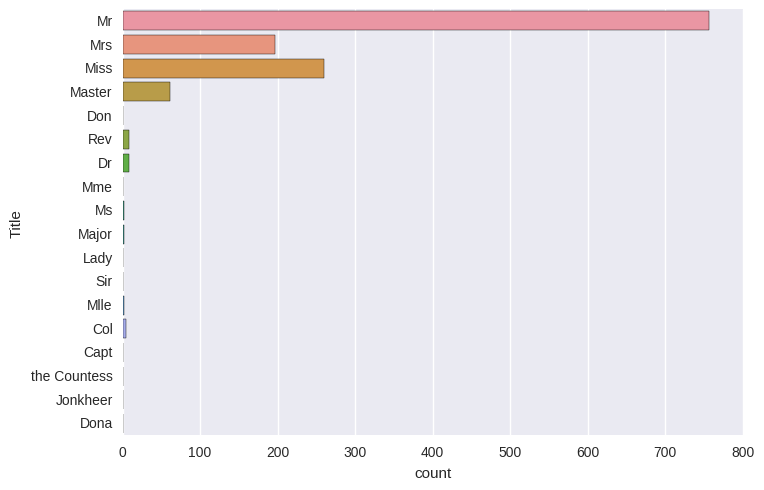

In [11]:
sns.countplot(y=df['Title'])
df.groupby('Title')['PassengerId'].count().sort_values(ascending=False)

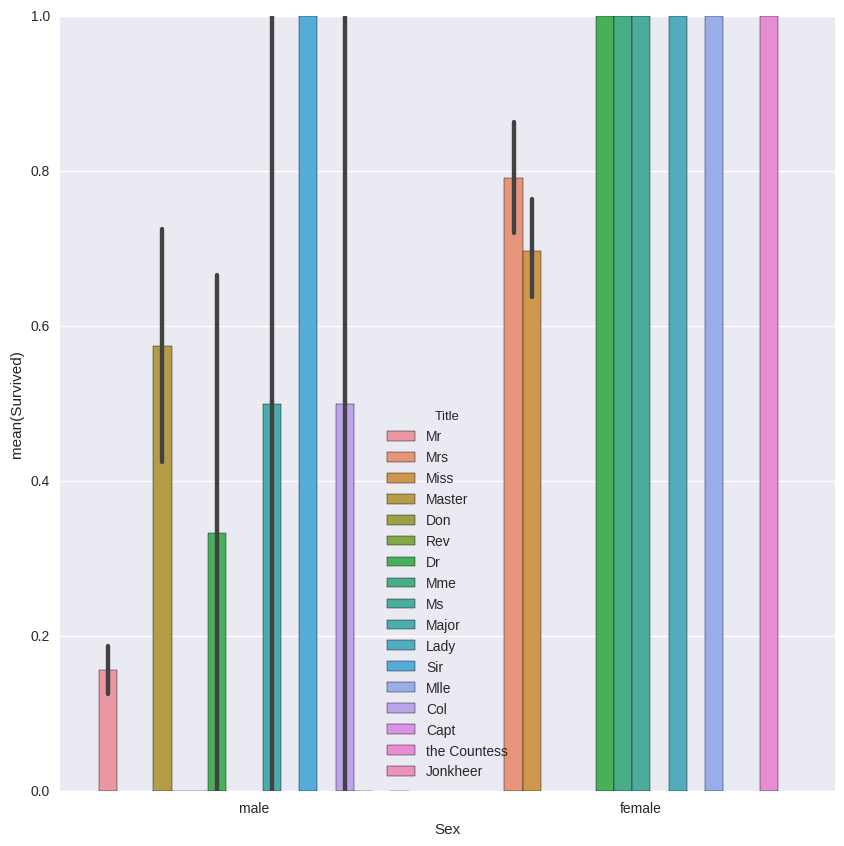

In [35]:
plt.figure(figsize=(10, 10))
sns.barplot(x='Sex', y='Survived', hue='Title', data=data)

In [39]:
for df in [data]:
    df['TicketLetter'] = df['Ticket'].apply(lambda x : str(x)[0])
    #df['TicketLength'] = df['Ticket'].apply(lambda x : len(x))

In [41]:
data.groupby(['TicketLetter'])['Survived'].mean().sort_values(ascending=False)

TicketLetter
9    1.000000
P    0.646154
1    0.630137
F    0.571429
2    0.464481
C    0.340426
S    0.323077
L    0.250000
3    0.239203
4    0.200000
6    0.166667
W    0.153846
7    0.111111
A    0.068966
8    0.000000
5    0.000000
Name: Survived, dtype: float64

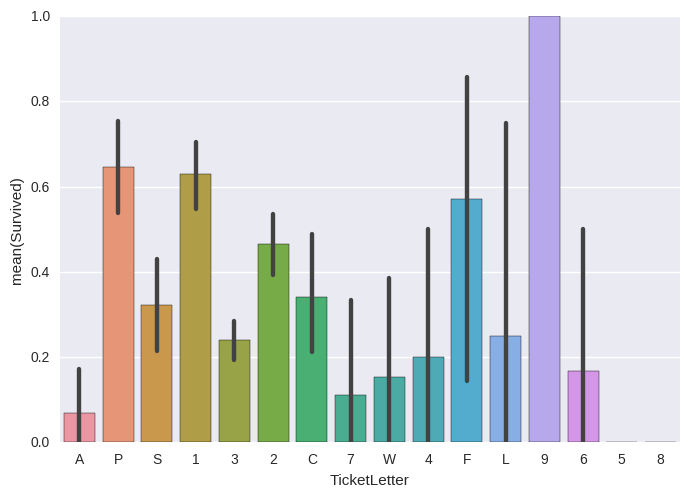

In [43]:
sns.barplot(x = 'TicketLetter', y='Survived', data=data)
df_count = data.groupby(['TicketLetter'],as_index=True)['PassengerId'].count().sort_values(ascending=False)